<a href="https://colab.research.google.com/github/Riyanshi243/Handwriting_Recognition/blob/main/HandwritingRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [3]:
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data()

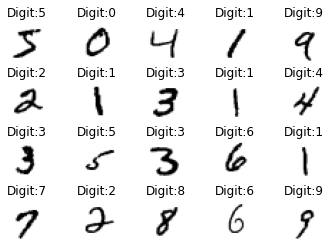

In [4]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(train_img[i],cmap='gray_r')
    plt.title("Digit:{}".format(train_lab[i]))
    plt.subplots_adjust(hspace=0.5)
    plt.axis('off')

In [5]:
print('Training images shape : ',train_img.shape)
print('Testing images shape : ',test_img.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


Text(0.5, 0, 'INTENSITY')

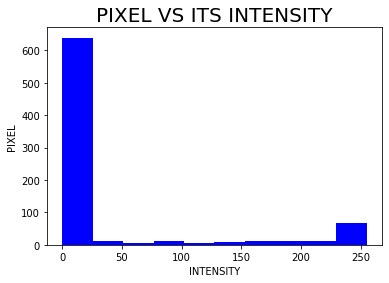

In [6]:
plt.hist(train_img[0].reshape(784),facecolor='blue')
plt.title('PIXEL VS ITS INTENSITY', fontsize=20)
plt.ylabel('PIXEL')
plt.xlabel('INTENSITY')

In [7]:
train_img=train_img/255.0
test_img=test_img/255.0

Text(0.5, 0, 'INTENSITY')

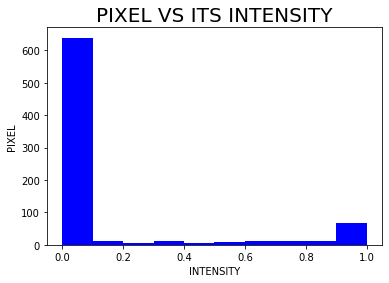

In [8]:
plt.hist(train_img[0].reshape(784),facecolor='blue')
plt.title('PIXEL VS ITS INTENSITY', fontsize=20)
plt.ylabel('PIXEL')
plt.xlabel('INTENSITY')

**CREATING THE MODEL**

In [9]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer=Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

In [10]:
#compiling the sequential model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(train_img,train_lab,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1805 - accuracy: 0.9452
Epoch 2/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0793 - accuracy: 0.9758
Epoch 3/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0550 - accuracy: 0.9826
Epoch 4/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0426 - accuracy: 0.9865
Epoch 5/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0334 - accuracy: 0.9893
Epoch 6/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0284 - accuracy: 0.9905
Epoch 7/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0265 - accuracy: 0.9916
Epoch 8/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0216 - accuracy: 0.9933
Epoch 9/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0205 - accuracy: 0.9937
Epoch 10/100
1875/1875 [==============================] - 14s 8m

In [12]:
model.save('Project.h5')

In [13]:
loss_acc=model.evaluate(test_img,test_lab,verbose=2)
print("Test Loss",loss_acc[0])
print("Test Accuracy",loss_acc[1])

313/313 - 1s - loss: 0.5463 - accuracy: 0.9822 - 1s/epoch - 4ms/step
Test Loss 0.5463405847549438
Test Accuracy 0.982200026512146


Predicted Value:  7
Successful Prediction


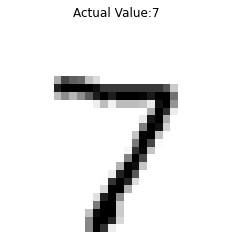

In [14]:
plt.imshow(test_img[0],cmap='gray_r')
plt.title("Actual Value:{}".format(test_lab[0]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(test_lab[0]==(np.argmax(prediction[0]))):
    print('Successful Prediction')
else:
    print('Unsuccessful Prediction') 

Predicted Value:  4
Successful Prediction


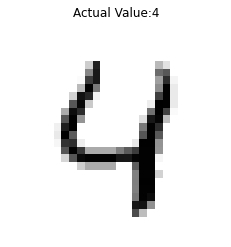

In [16]:
plt.imshow(test_img[4],cmap='gray_r')
plt.title("Actual Value:{}".format(test_lab[4]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[4]))
if(test_lab[4]==(np.argmax(prediction[4]))):
    print('Successful Prediction')
else:
    print('Unsuccessful Prediction') 